In [ ]:
%load_ext autoreload
%autoreload 2
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from postprocessing import retrieve_stack_info, plotstack
import astropy.units as u

In [4]:
filepath = "../testing/testing_data/consol_stacks_lrgs_zlim_elgclrgc_nu10gt2_e10gtpt3_o10_100pct_0.81_0.94.h5"

## Retrieve the stack data in comoving Mpc

Stacks from the following maps available: ACT_y_fid
Reading stack data from the map: ACT_y_fid
11.082667436808604 20.0 0.3977785517852376
z_0.79_0.81


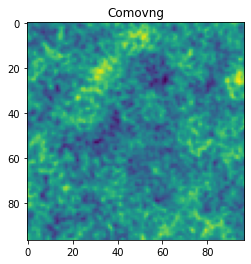

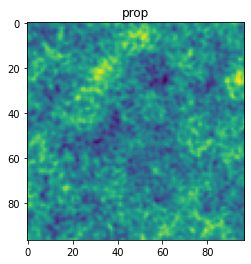

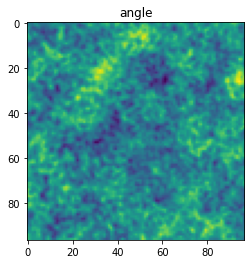

z_0.81_0.83


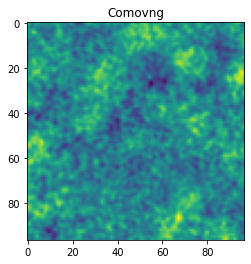

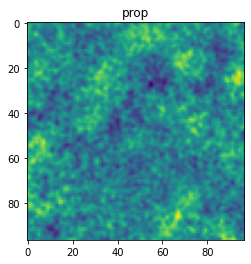

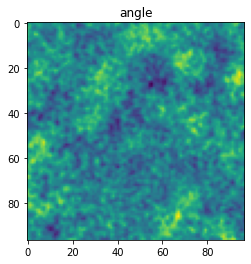

z_0.82_0.84


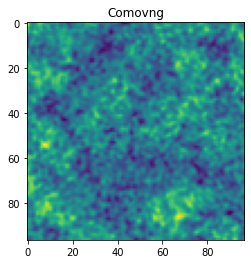

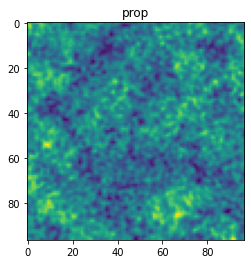

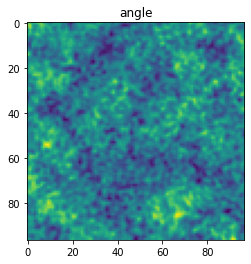

z_0.83_0.85


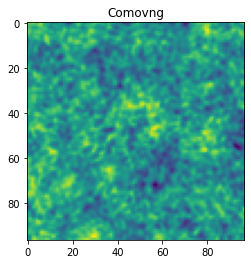

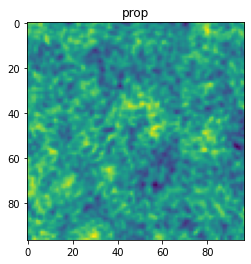

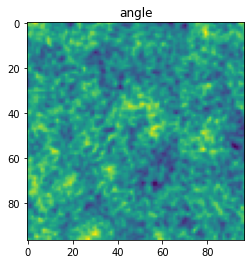

z_0.84_0.86


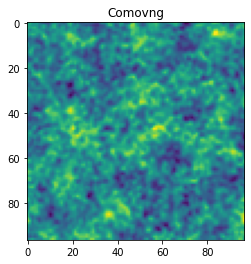

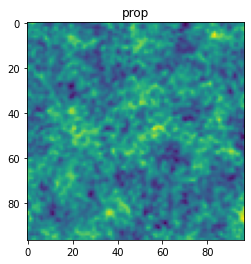

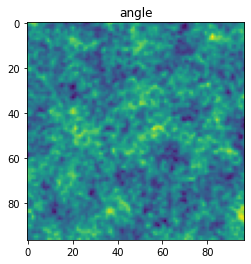

z_0.85_0.87


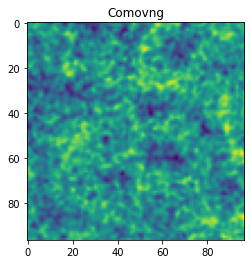

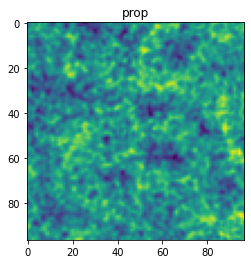

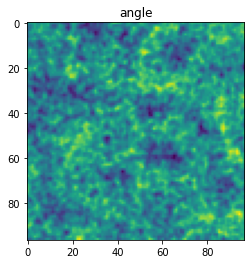

z_0.86_0.88


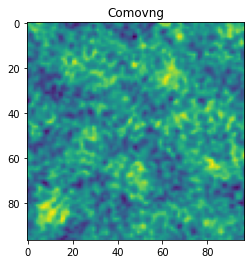

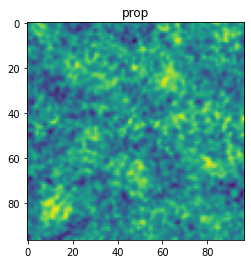

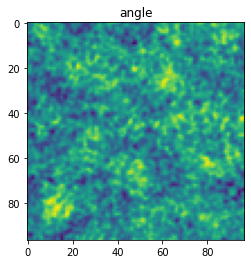

z_0.87_0.89


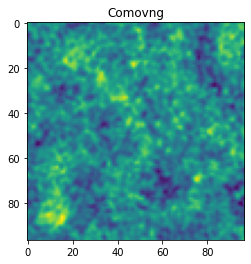

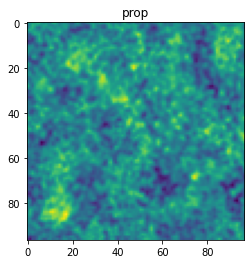

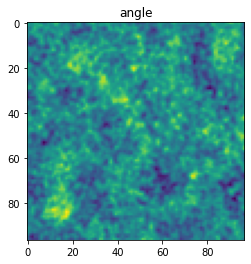

z_0.88_0.90


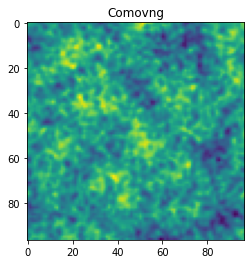

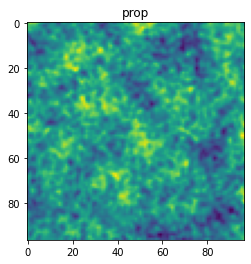

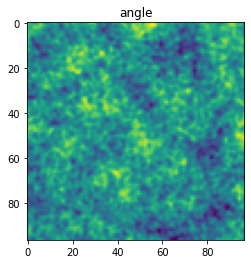

z_0.89_0.91


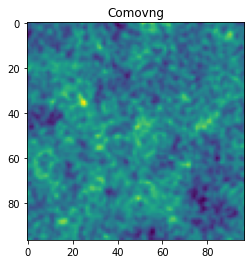

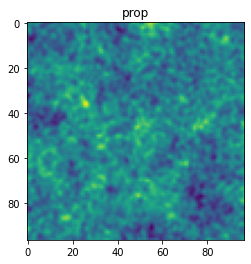

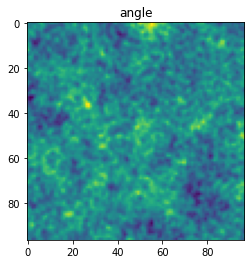

z_0.90_0.92


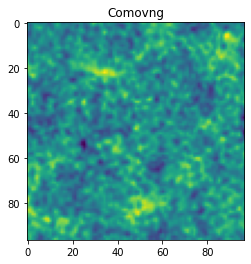

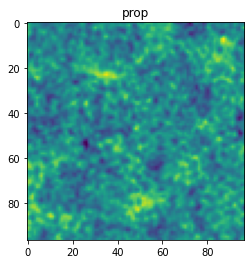

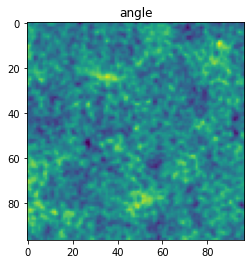

z_0.91_0.93


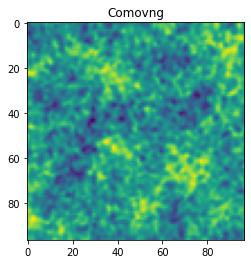

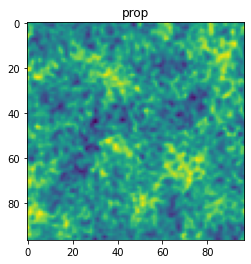

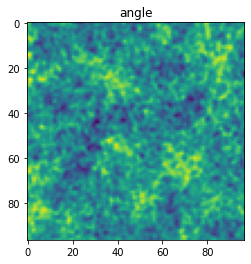

z_0.92_0.94


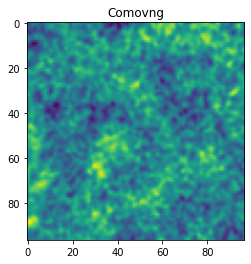

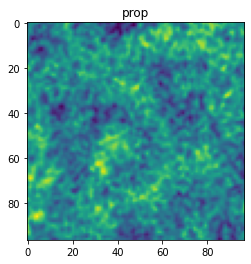

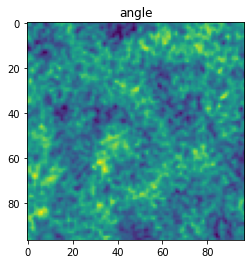

<Figure size 432x288 with 0 Axes>

In [8]:
with h5.File(filepath, "r") as f:
    for map in f.keys():
        print("Stacks from the following maps available:", map)
        mapdata = f[map]
        print("Reading stack data from the map:", map)
        break # just take the first map

    print(f.attrs['cutout_rad_pMpc'], f.attrs['cutout_rad_cMpc'], f.attrs['cutout_rad_deg'])

    imgs = []
    wgts = []
    Crprofs = []
    Srprofs = []
    collected_rs = False
    for reg in mapdata.keys():
        thisreg_imgs = []
        thisreg_wgts = []
        thisreg_cr_profs = []
        thisreg_sr_profs = []
        for zbin in mapdata[reg].keys():
            print(zbin)
            # if not collected_rs:
                # get some info from the first region, which will be the same for all
                # print(mapdata[reg][zbin]['r_comov_Mpc'][:])
                # print(mapdata[reg][zbin]['r_prop_Mpc'][:])
                # print(mapdata[reg][zbin]['r_deg'][:])
                # collected_rs = True
            # print(mapdata[reg][zbin]['stack_comov'][:]==mapdata[reg][zbin]['stack_phys'][:])
            plt.imshow(mapdata[reg][zbin]['stack_comov'][:])
            plt.title("Comovng")
            plt.show()
            plt.clf()
            plt.imshow(mapdata[reg][zbin]['stack_phys'][:])
            plt.title("prop")
            plt.show()
            plt.clf()
            plt.imshow(mapdata[reg][zbin]['stack_deg'][:])
            plt.title("angle")
            plt.show()
            plt.clf()
            # print(mapdata[reg][zbin]['stack_deg'][:]==mapdata[reg][zbin]['stack_phys'][:])
            
            # print(mapdata[reg][zbin]['stack_deg'][:]==mapdata[reg][zbin]['stack_comov'][:])
            thisreg_imgs.append(mapdata[reg][zbin]['stack_comov'][:])
            thisreg_wgts.append(mapdata[reg][zbin].attrs["Nobj"])
            thisreg_cr_profs.append(mapdata[reg][zbin]["Cr_deg_profiles"])
            thisreg_sr_profs.append(mapdata[reg][zbin]["Sr_deg_profiles"])
        break

In [10]:
MyStack_comov = retrieve_stack_info(filepath, format="constant_comoving", binsize=2, crop_center=2.0, r_m0_normalization=8)

retrieving data from ../testing/testing_data/consol_stacks_lrgs_zlim_elgclrgc_nu10gt2_e10gtpt3_o10_100pct_0.81_0.94.h5
Stacks from the following maps available: ACT_y_fid
Reading stack data from the map: ACT_y_fid
Number of splits 48


/cita/h/home-2/mlokken/oriented_stacking/oriented_superclustering/notebooks/../stack_statistics.py:24: RuntimeWarning: invalid value encountered in double_scalars
  corcoeff = covmat[i, j] / np.sqrt(covmat[i, i] * covmat[j, j])


## View the image

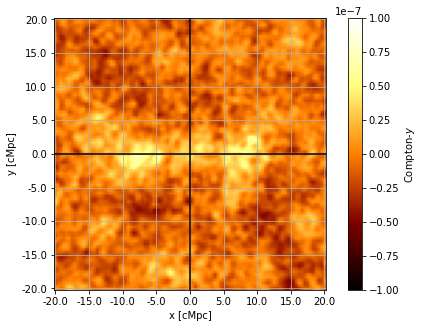

In [19]:
img = plotstack(MyStack_comov.avg_img, MyStack_comov.radius)

## Plot the profiles

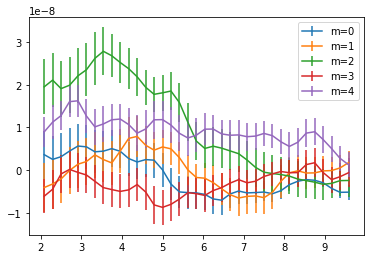

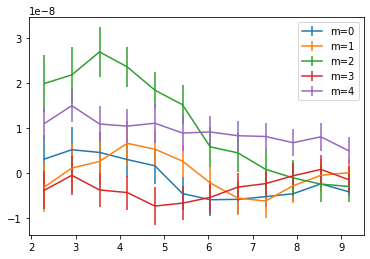

In [12]:
for m in range(5):
    plt.errorbar(MyStack_comov.r, MyStack_comov.Cr_avg_profiles[m], yerr=MyStack_comov.Cr_errors_full[m], label=f"m={m}") # /np.sqrt(48)
plt.legend()
plt.show()
plt.clf()
for m in range(5):
    plt.errorbar(MyStack_comov.r_binned, MyStack_comov.Cr_avg_profiles_binned[m], yerr=MyStack_comov.Cr_errors_binned[m], label=f"m={m}")
plt.legend()

## Retrieve the stack data in proper Mpc

In [13]:
MyStack_proper = retrieve_stack_info(filepath, format="constant_physical", binsize=2, crop_center=2.0, r_m0_normalization=8)

retrieving data from ../testing/testing_data/consol_stacks_lrgs_zlim_elgclrgc_nu10gt2_e10gtpt3_o10_100pct_0.81_0.94.h5
Stacks from the following maps available: ACT_y_fid
Reading stack data from the map: ACT_y_fid
Number of splits 48


/cita/h/home-2/mlokken/oriented_stacking/oriented_superclustering/notebooks/../stack_statistics.py:24: RuntimeWarning: invalid value encountered in double_scalars
  corcoeff = covmat[i, j] / np.sqrt(covmat[i, i] * covmat[j, j])


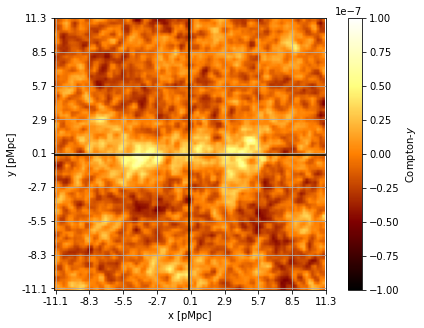

In [14]:
img = plotstack(MyStack_proper.avg_img, MyStack_proper.radius, unit='pMpc')

## Plot the profiles

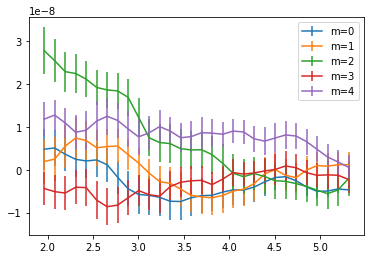

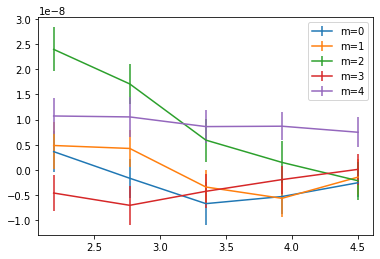

In [15]:
for m in range(5):
    plt.errorbar(MyStack_proper.r, MyStack_proper.Cr_avg_profiles[m], yerr=MyStack_proper.Cr_errors_full[m], label=f"m={m}") # /np.sqrt(48)
plt.legend()
plt.show()
plt.clf()
for m in range(5):
    plt.errorbar(MyStack_proper.r_binned, MyStack_proper.Cr_avg_profiles_binned[m], yerr=MyStack_proper.Cr_errors_binned[m], label=f"m={m}")
plt.legend()

## Retrieve the stack data in degrees

In [16]:
MyStack_angular = retrieve_stack_info(filepath, format="constant_angular", binsize=.05, crop_center=.05, r_m0_normalization=1)

retrieving data from ../testing/testing_data/consol_stacks_lrgs_zlim_elgclrgc_nu10gt2_e10gtpt3_o10_100pct_0.81_0.94.h5
Stacks from the following maps available: ACT_y_fid
Reading stack data from the map: ACT_y_fid
Number of splits 48


/cita/h/home-2/mlokken/oriented_stacking/oriented_superclustering/notebooks/../stack_statistics.py:24: RuntimeWarning: invalid value encountered in double_scalars
  corcoeff = covmat[i, j] / np.sqrt(covmat[i, i] * covmat[j, j])


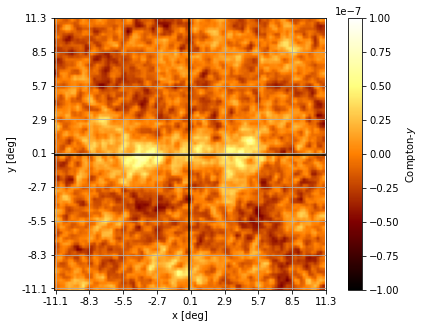

In [17]:
img = plotstack(MyStack_angular.avg_img, MyStack_proper.radius, unit='deg')

## Plot the profiles

In [ ]:
MyStack

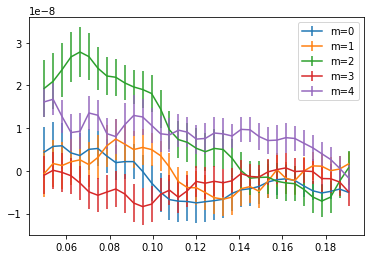

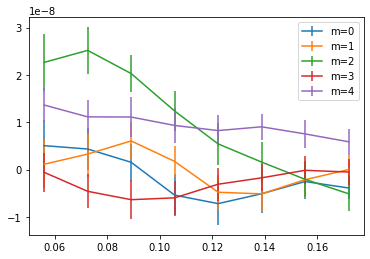

In [18]:
for m in range(5):
    plt.errorbar(MyStack_angular.r, MyStack_angular.Cr_avg_profiles[m], yerr=MyStack_angular.Cr_errors_full[m], label=f"m={m}") # /np.sqrt(48)
plt.legend()
plt.show()
plt.clf()
for m in range(5):
    plt.errorbar(MyStack_angular.r_binned, MyStack_angular.Cr_avg_profiles_binned[m], yerr=MyStack_angular.Cr_errors_binned[m], label=f"m={m}")
plt.legend()